In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_loader import CovidDataLoader
from analysis import CovidAnalysis
from visualization import CovidVisualizer

### Load processed data

In [2]:
loader = CovidDataLoader()
merged_data = pd.read_csv('../data/processed/merged_covid_data.csv')
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

In [3]:
analyzer = CovidAnalysis(merged_data)
visualizer = CovidVisualizer()

### Analyze specific countries

In [4]:
countries_to_analyze = ['US', 'India', 'Brazil', 'Russia', 'United Kingdom','France']

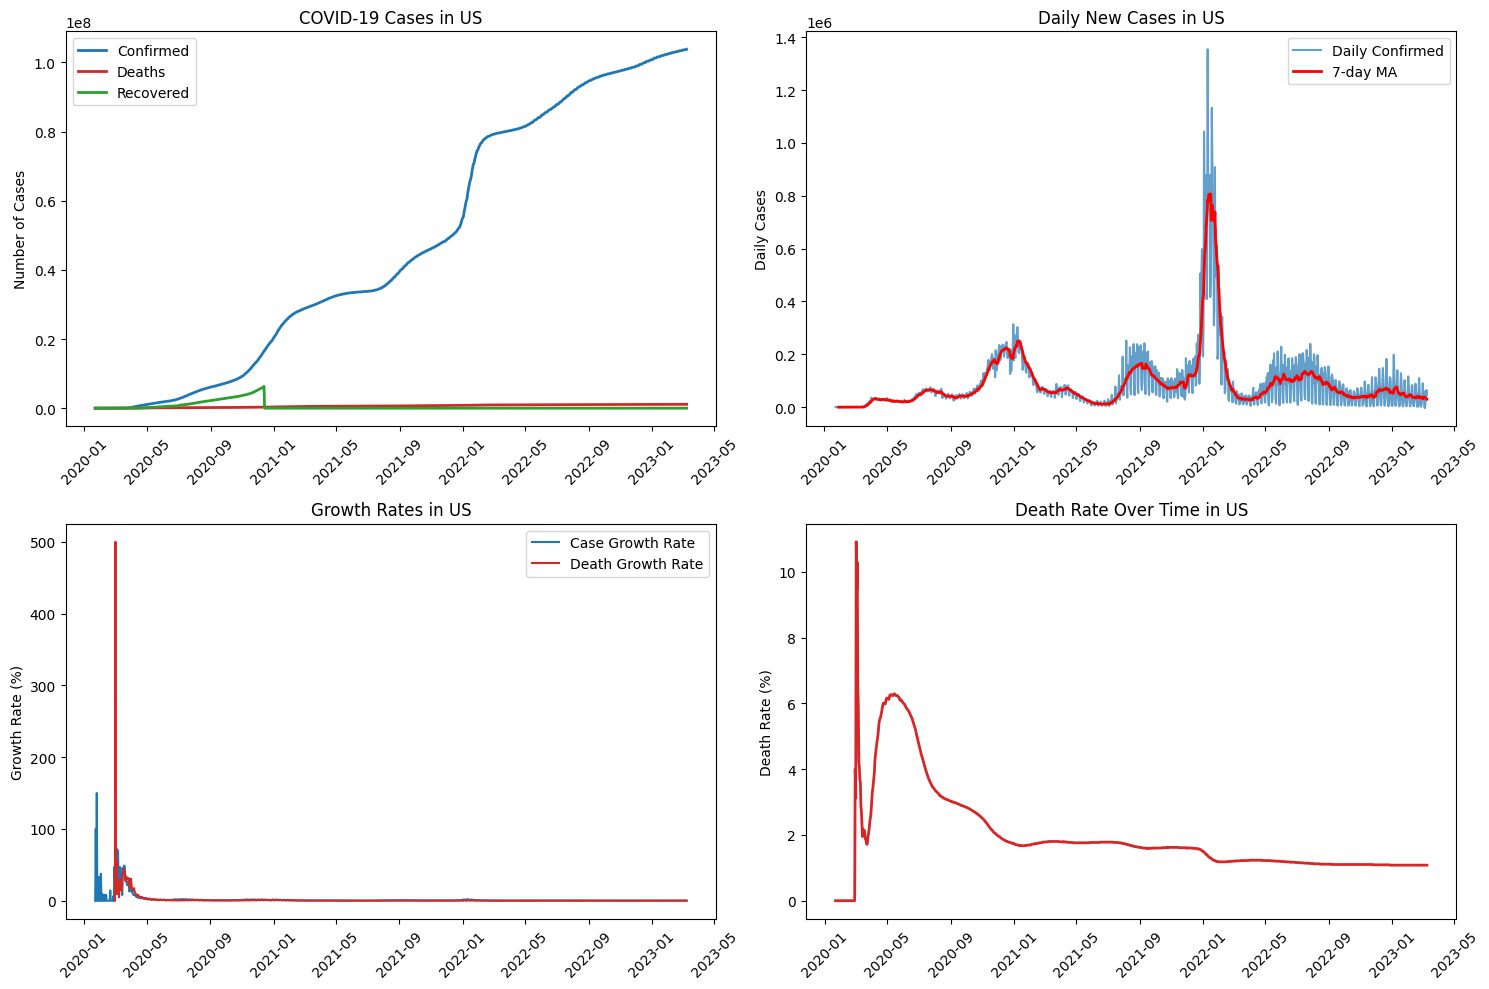

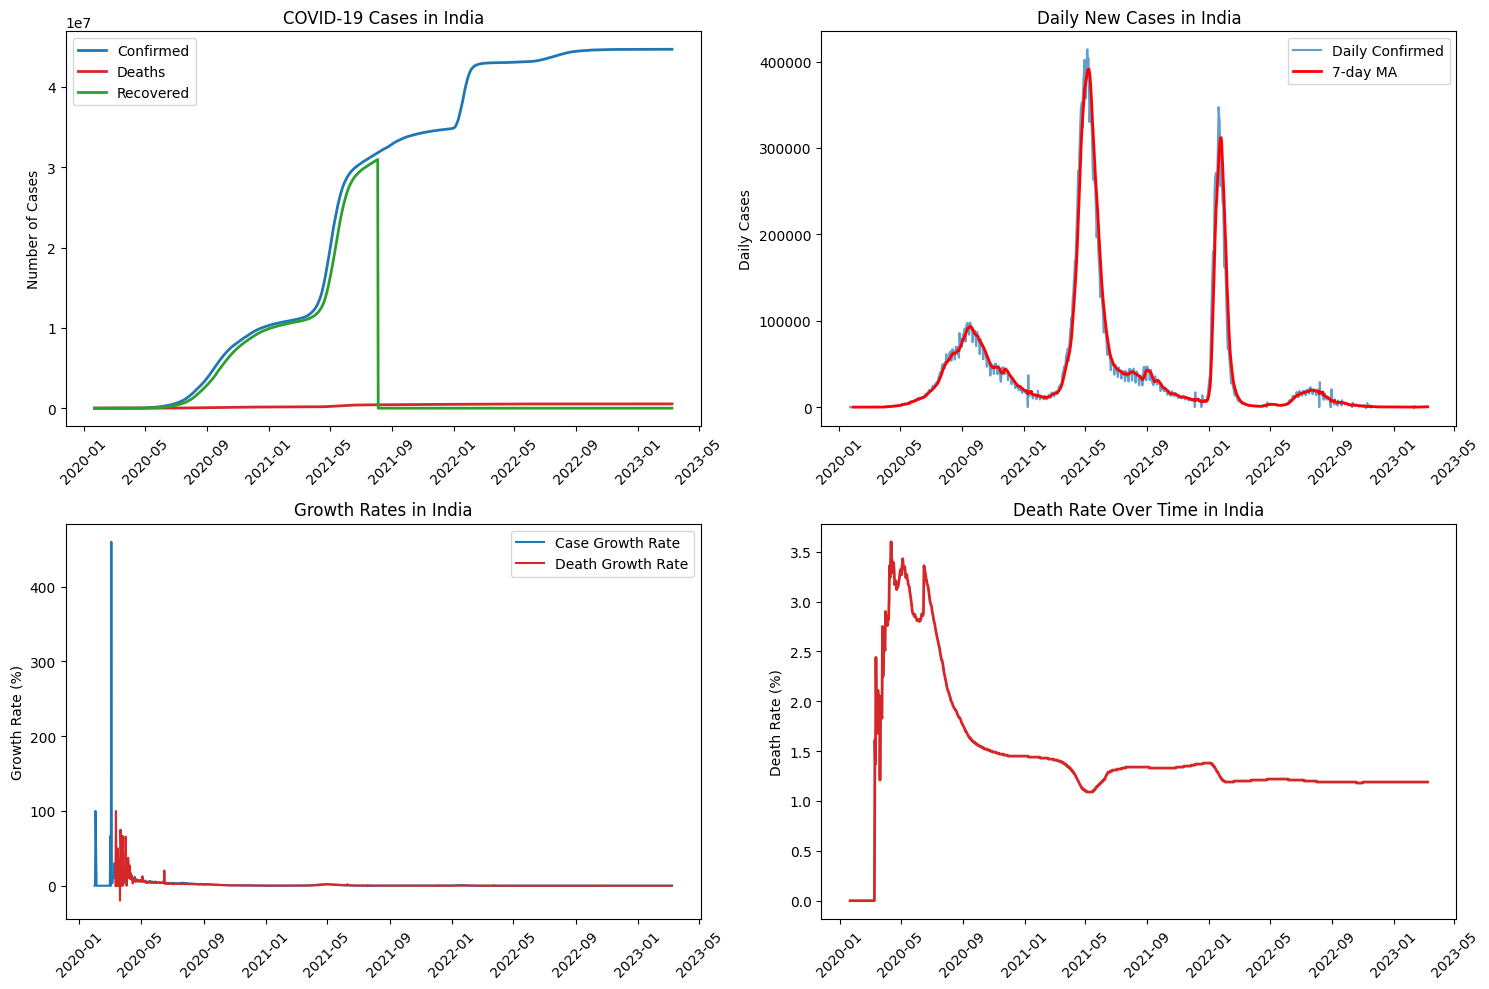

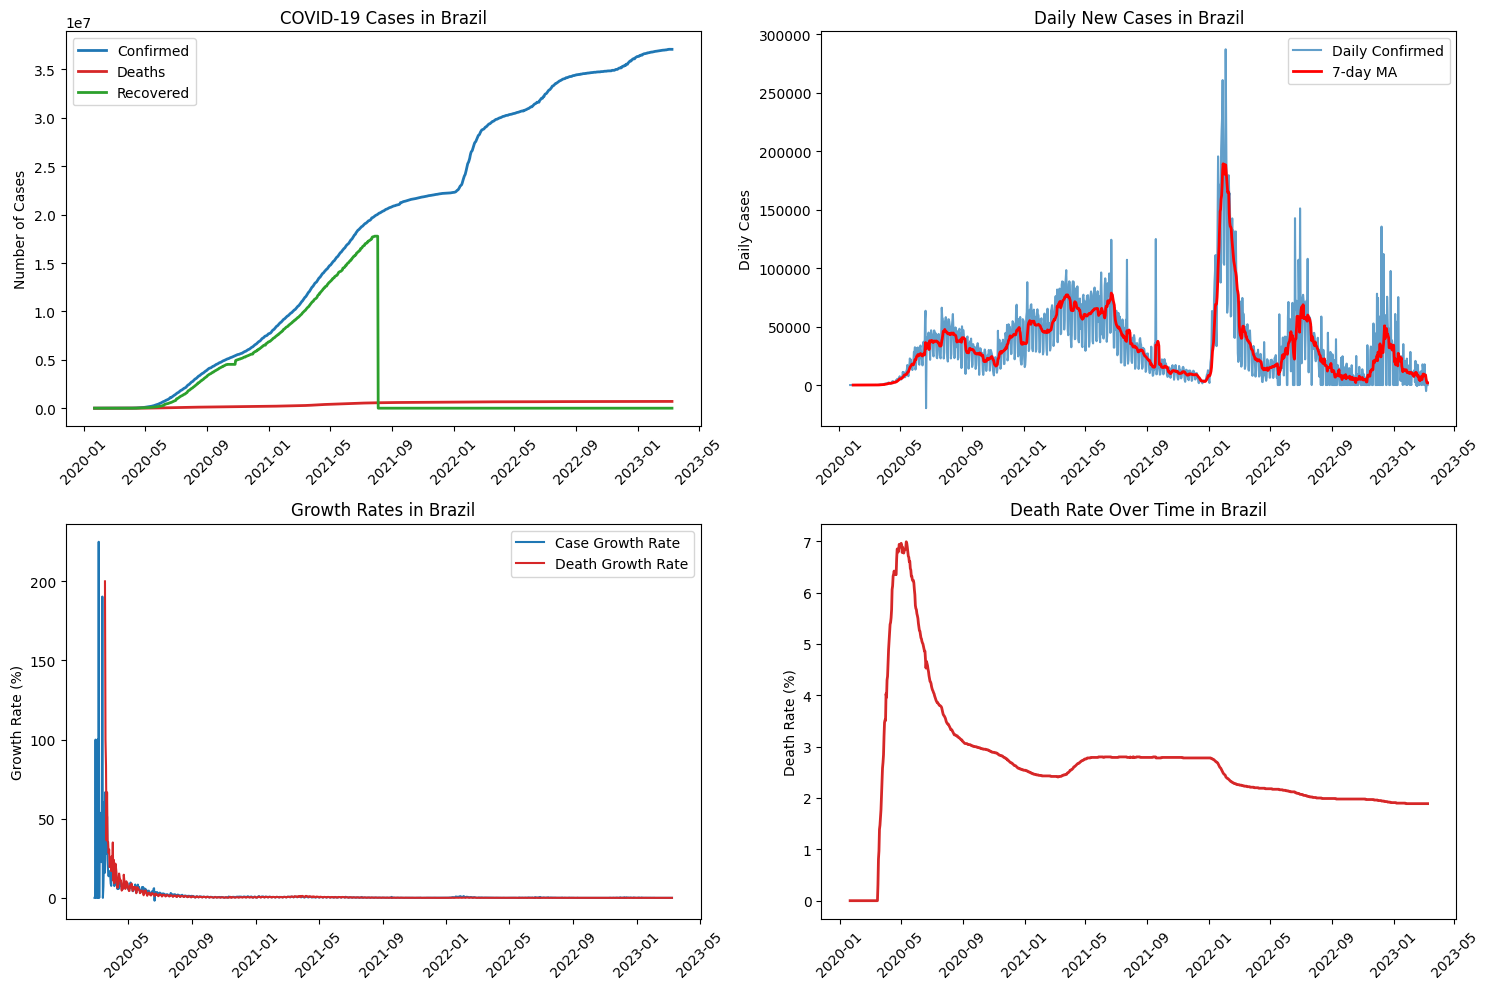

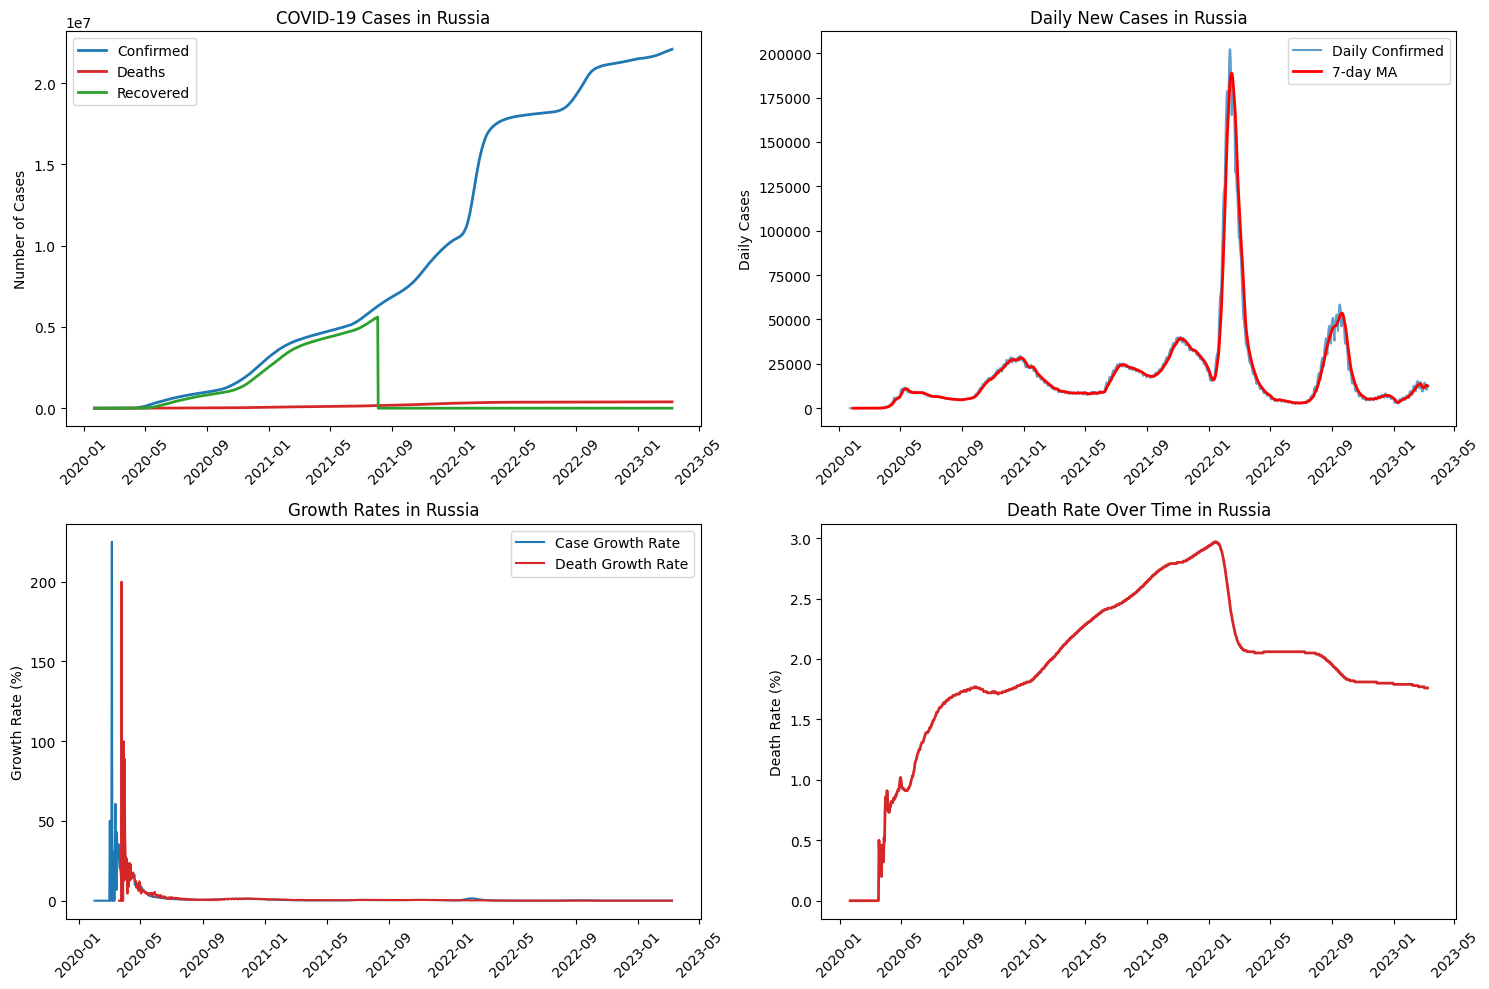

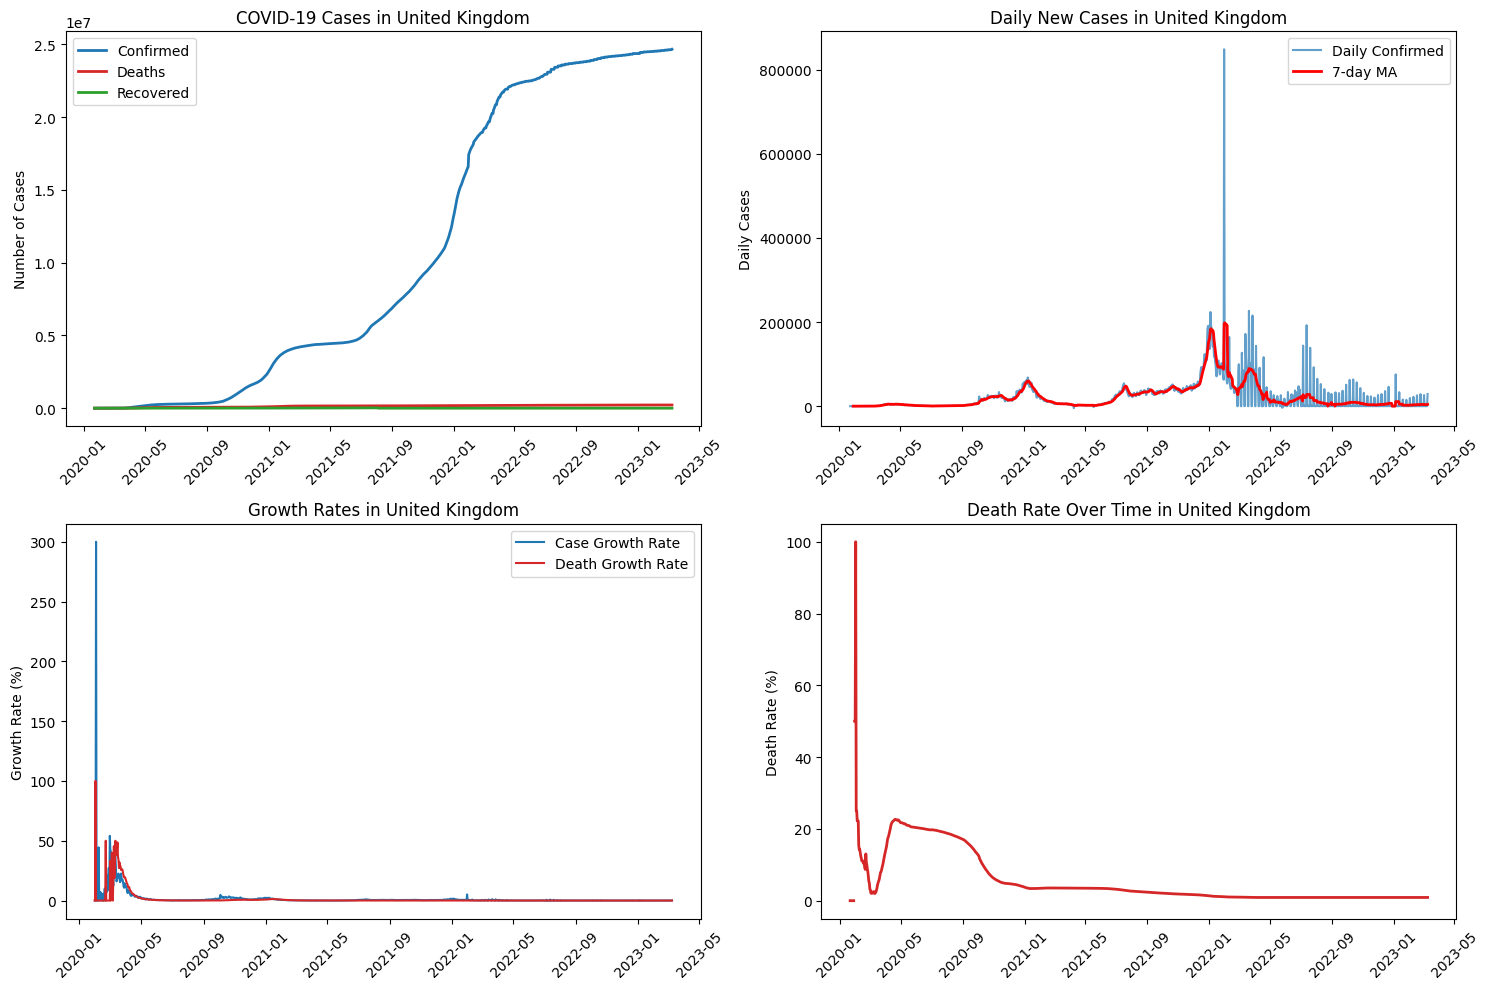

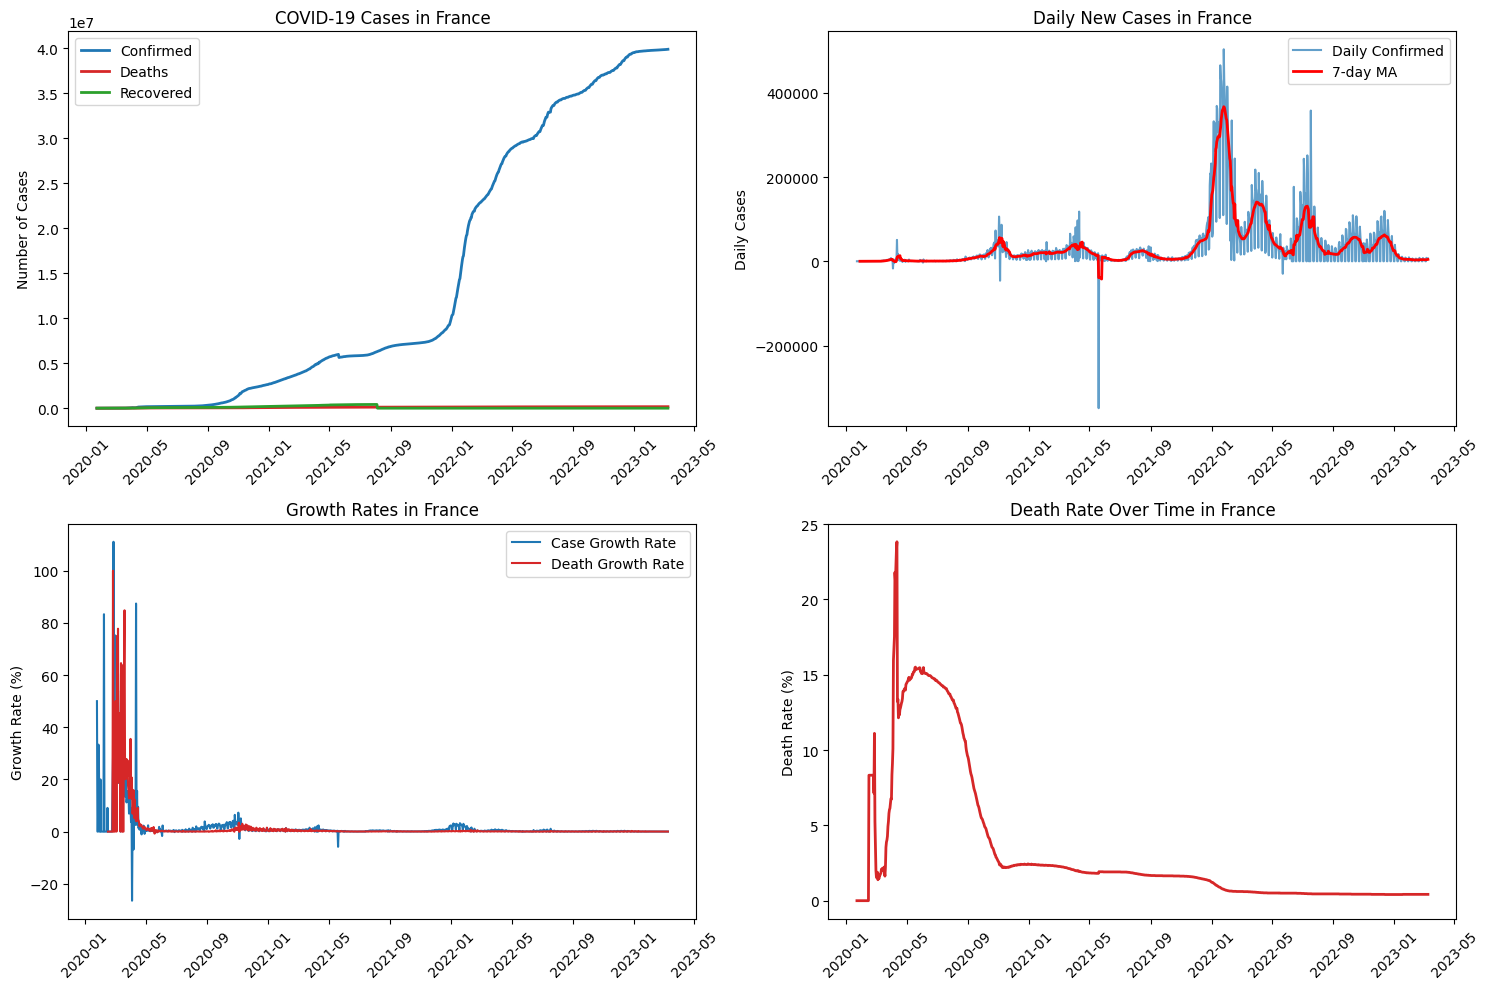

In [5]:
# Create time series plots for each country
for country in countries_to_analyze:
    country_data = analyzer.get_country_time_series(country)
    country_data = analyzer.calculate_growth_rates(country_data)
    
    fig = visualizer.plot_country_time_series(country_data, country)
    plt.savefig(f'../figures/{country}_time_serie.png', 
                dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

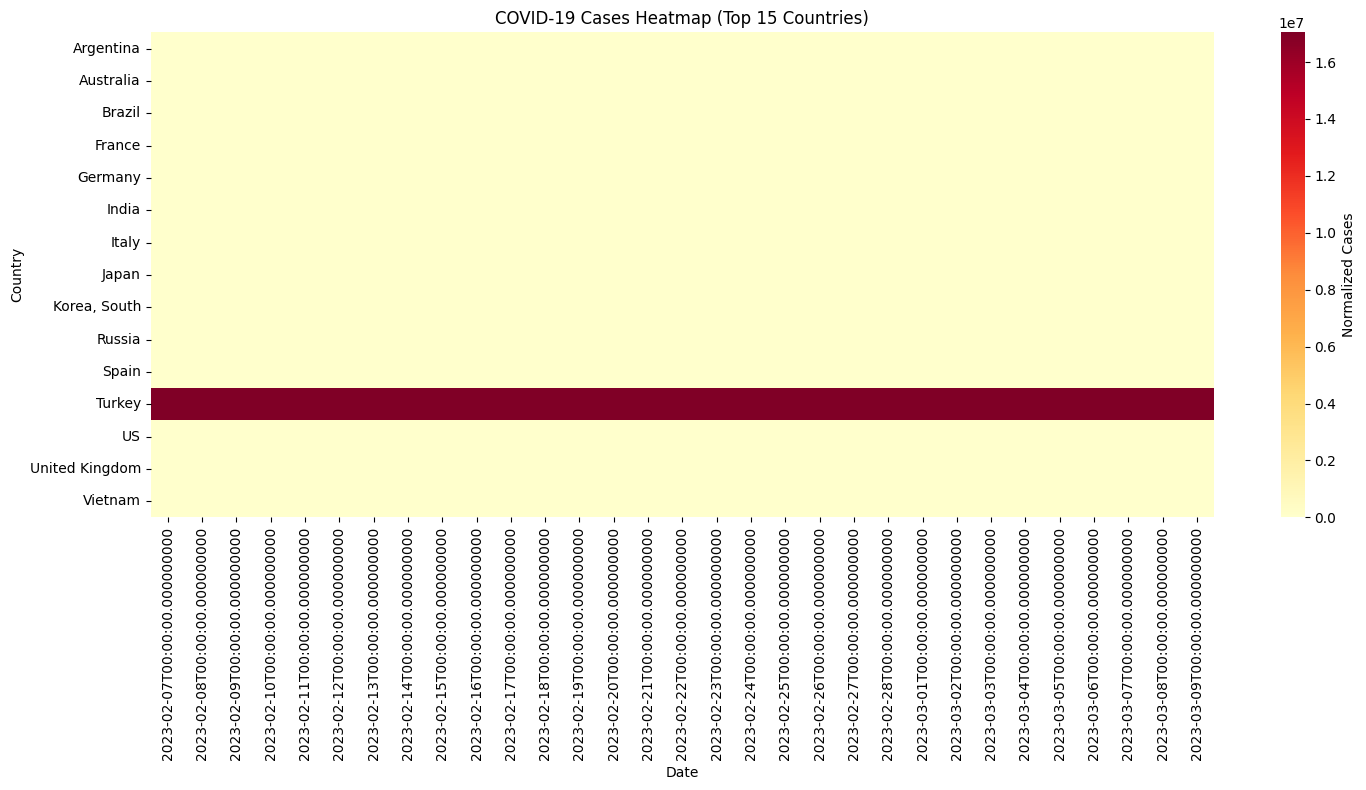

In [7]:
# Heatmap of top countries
top_countries = analyzer.get_top_countries_by_cases(15)['Country/Region'].tolist()
heatmap_data = visualizer.create_heatmap_data(merged_data, top_countries)

fig = visualizer.plot_heatmap(heatmap_data, 'COVID-19 Cases Heatmap (Top 15 Countries)')
plt.savefig(f'../figures/Covid_19_Heatmap.png', bbox_inches='tight', facecolor='white')
plt.show()

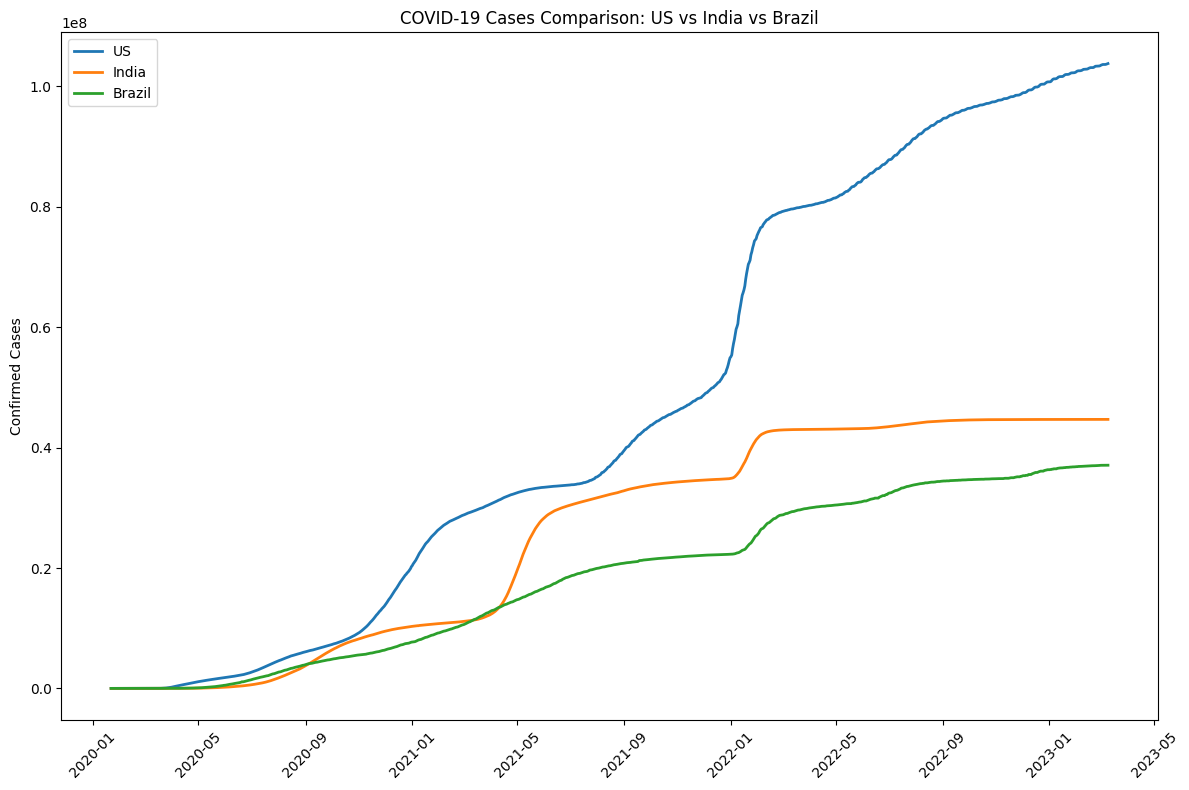

In [8]:
# Comparative analysis
fig, ax = plt.subplots(figsize=(12, 8))

for i, country in enumerate(['US', 'India', 'Brazil']):
    country_data = analyzer.get_country_time_series(country)
    ax.plot(country_data['Date'], country_data['Confirmed'], 
            label=country, color=visualizer.colors[i], linewidth=2)

ax.set_title('COVID-19 Cases Comparison: US vs India vs Brazil')
ax.set_ylabel('Confirmed Cases')
ax.legend()
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig(f'../figures/Covid19_Case_Comparison.png', 
                dpi=300, bbox_inches='tight', facecolor='white')
plt.show()